<a href="https://colab.research.google.com/github/Rogerio-mack/IA_2023S2/blob/main/IA_N2_2023S2_solucao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<head>
  <meta name="author" content="Rogério de Oliveira">
  <meta institution="author" content="Universidade Presbiteriana Mackenzie">
</head>

<img src="http://meusite.mackenzie.br/rogerio/mackenzie_logo/UPM.2_horizontal_vermelho.jpg" width=300, align="right">
<!-- <h1 align=left><font size = 6, style="color:rgb(200,0,0)"> optional title </font></h1> -->


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Case: **Student Stress**

Neste case você vai empregar dados relacionados a estudantes para determinar o seu nível de stress.

In [ ]:
df_train = pd.read_csv('https://github.com/Rogerio-mack/IA_2023S2/raw/main/StressStudentsTrain.csv')
display(df_train.head(), df_train.shape)

df_test = pd.read_csv('https://github.com/Rogerio-mack/IA_2023S2/raw/main/StressStudentsTest.csv')
display(df_test.head(), df_test.shape)

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
0,0,28,0,3,1,2,4,2,1,3,...,5,4,2,5,1,3,1,1,1,0
1,14,30,0,9,2,3,5,5,1,4,...,3,5,0,0,4,1,2,3,0,0
2,21,11,1,20,3,3,1,4,5,1,...,1,1,3,2,5,1,5,5,4,2
3,21,4,1,26,3,3,1,3,3,2,...,2,2,5,1,5,1,5,4,4,2
4,3,0,1,4,1,3,1,5,4,3,...,3,1,1,2,1,1,0,4,4,2


(880, 21)

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
0,7,30,0,3,1,2,5,2,1,4,...,5,5,1,4,1,3,2,1,1,0
1,15,0,1,27,3,3,1,5,5,2,...,1,1,4,2,4,1,4,4,4,2
2,14,19,1,10,2,1,2,4,3,2,...,3,2,2,2,2,2,2,3,3,1
3,16,4,1,26,4,3,1,4,5,2,...,1,2,5,1,4,1,5,5,4,2
4,7,29,0,5,1,2,4,1,1,3,...,4,5,1,5,1,3,2,1,1,0


(220, 21)

# Exercício 1. **Decision Tree Classification $\times$ Multilayer Perceptron**

Neste exercício você fará um modelo de árvore de decisão e outro de MLP para predição o nível de stress dos estudantes.

Para normalização dos dados empregue o `StandardScaler`. Em todos lugares onde for necessário para reprodutibilidade dos resultados, empregue o `random_state=1`.





## Exercício 1.1.

Separe os atributos preditores e o atributo objetivo dos conjuntos de treinamento e teste e, em seguida, normalize os dados.

**Dica:** normalize os dados de treinamento e aplique o mesmo estimador ajustado aos dados de teste!

In [ ]:
X_train = df_train.drop(columns='stress_level')
X_test = df_test.drop(columns='stress_level')

y_train = df_train['stress_level']
y_test = df_test['stress_level']

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler =  StandardScaler()

X_train = scaler.fit_transform(df_train.drop(columns='stress_level'))
X_test = scaler.transform(df_test.drop(columns='stress_level'))

In [ ]:
#@markdown check if TRUE
X_train.sum().sum() == -2.957634137601417e-13 and X_test.sum().sum() == -3.0458031228583113

True

## Exercício 1.2.

Faça um modelo de Árvore de Decisão. Exceto o `random_state`, empregue todos os demais parâmetros padrão.

**Q1. Qual a acuracidade do seu modelo de Árvore de Decisão obtida sobre o conjunto de teste?**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

dtree = DecisionTreeClassifier(random_state=1)
dtree.fit(X_train, y_train)

y_pred = dtree.predict(X_test)
print(classification_report(y_test, y_pred))



              precision    recall  f1-score   support

           0       0.94      0.86      0.90        74
           1       0.88      0.90      0.89        72
           2       0.86      0.91      0.88        74

    accuracy                           0.89       220
   macro avg       0.89      0.89      0.89       220
weighted avg       0.89      0.89      0.89       220



## Exercício 1.3.

**Q2. Use a árvore de decisão obtida para descobrir: quais os 3 atributos apresentam maior ganho de informação para determinar o nível de stress dos estudantes?**

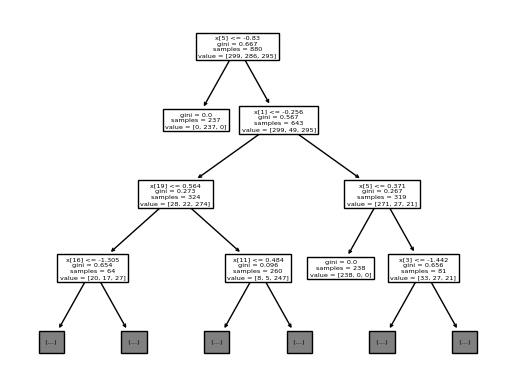

In [ ]:
from sklearn import tree

tree.plot_tree(dtree,max_depth=3)
plt.show()

In [ ]:
df_train.columns[[5,1,19]]

Index(['blood_pressure', 'self_esteem', 'bullying'], dtype='object')

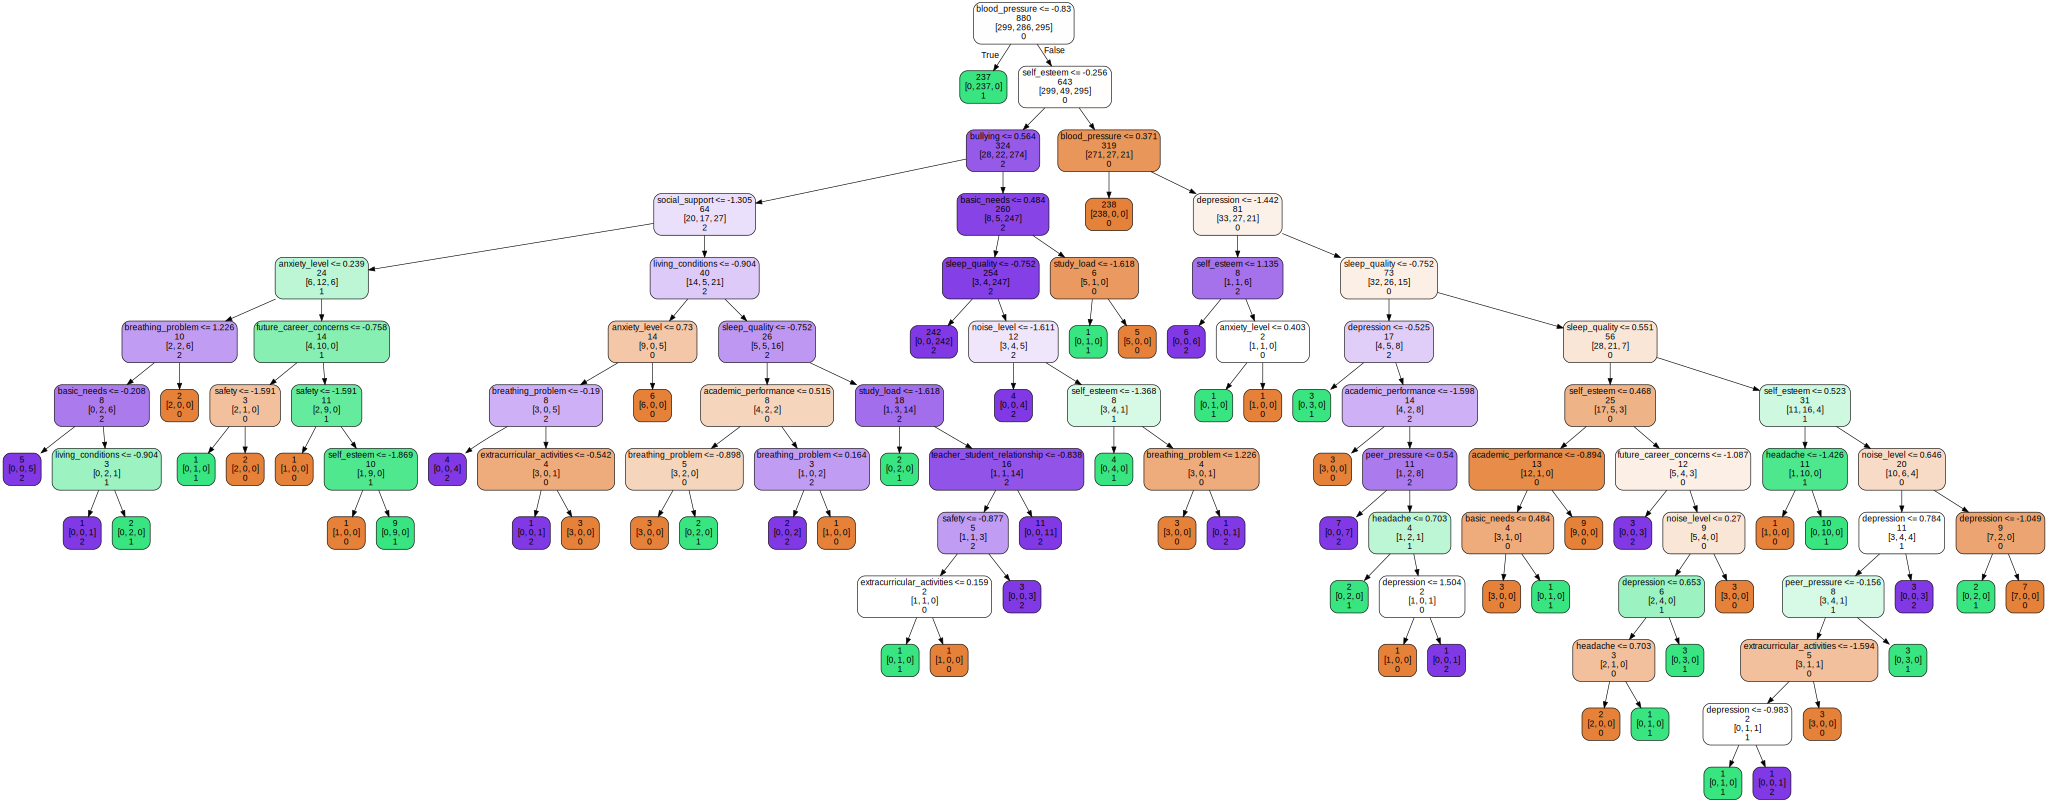

In [ ]:
import graphviz
dot_data = tree.export_graphviz(dtree, out_file=None,
                     feature_names=list(df_train.columns[0:-1].values),
                     class_names=list(sorted(df_train['stress_level'].unique().astype('str'))),
                     filled=True, rounded=True,
                     special_characters=False,
                     proportion=False, impurity=False, node_ids=False,label=None)
graph = graphviz.Source(dot_data)
graph.render('Student_Stress_Decision_Tree') # para gravação em .pdf
graph

## Exercício 1.4.

Faça um modelo Multi-Layer Perceptron. Empregue uma rede neural com 3 camadas ocultas com 4,8,4 elementos respectivamente. Configure ainda a tangente hiperbólica como função de ativação e 1000 iterações de treinamento do modelo.

**Q3. Qual a acuracidade do seu modelo MLP obtida sobre o conjunto de teste?**

In [ ]:
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import classification_report

mlp = MLPClassifier(hidden_layer_sizes=(4,8,4),random_state=1,activation='tanh',max_iter=1000)
mlp.fit(X_train, y_train)

y_pred = mlp.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.89      0.89        74
           1       0.93      0.90      0.92        72
           2       0.88      0.89      0.89        74

    accuracy                           0.90       220
   macro avg       0.90      0.90      0.90       220
weighted avg       0.90      0.90      0.90       220



## Exercício 1.5.

**Q4. No modelo de maior acuracidade, qual classe apresenta melhores resultados, e qual o seu f1-score?**

**Q5. Qual o número de falsos negativos e falsos positivos para a classe da questão anterior?**

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print('\nMatriz de Confusão:\n')
print(cm)
print()


Matriz de Confusão:

[[66  4  4]
 [ 2 65  5]
 [ 7  1 66]]



# Exercício 2. **Clustering $\times$ Test**

Neste exercício você vai aplicar algoritmos de clusterização Kmédias e Hierárquica sobre o conjunto de teste.

Para normalização dos dados empregue o `StandardScaler`, caso você ainda não tenha feito, faça o exercício 1.1. Em todos lugares onde for necessário para reprodutibilidade dos resultados, empregue o `random_state=1`.







## Exercício 2.1.

Faça uma clusterização kmédias em 3 grupos do conjunto de teste (sem a classe `stress_level`!) e analise os grupos formados.

**Q6. Qual dos grupos parece apresentar indivíduos com uma saúde geral muito melhor (menos dor de cabeça, maior autoestima, menos depressão, maior qualidade do sono, etc.) e qual grupo apresenta indicadores menores no geral (seja para os indicadores positivos ou negativos)?**

In [ ]:
from sklearn.cluster import KMeans

clf = KMeans(n_clusters = 3, random_state= 1, n_init=10)
clf.fit(X_test)

KMeans(n_clusters=3, n_init=10, random_state=1)

In [ ]:
clf.cluster_centers_

array([[-1.15128747,  1.07173529, -0.97752522, -1.09153249, -1.0707672 ,
        -0.21024703,  1.26900515, -0.91495214, -0.90020627,  0.98420665,
         1.28194966,  1.12602688,  1.15739495, -0.88528907,  1.32504618,
        -1.07653167,  1.05312611, -0.77972525, -0.85377454, -1.04088447],
       [ 0.03032159,  0.01658581,  0.04447789, -0.0016364 ,  0.02439936,
        -0.67322157, -0.07233025,  0.01021671, -0.04877143, -0.04222962,
        -0.2174159 , -0.34372938, -0.13608831, -0.11680104, -0.30115424,
        -0.14437398,  0.05541412, -0.20869219, -0.25992144, -0.18535112],
       [ 1.12965708, -1.09861034,  1.02299151,  1.15542612,  0.99236997,
         0.97185088, -1.0674702 ,  0.69801992,  1.04571482, -0.84273281,
        -0.82767511, -0.9375162 , -0.88853413,  1.04097757, -0.92233236,
         1.18711046, -0.84194468,  1.17688456,  1.13064492,  1.09868397]])

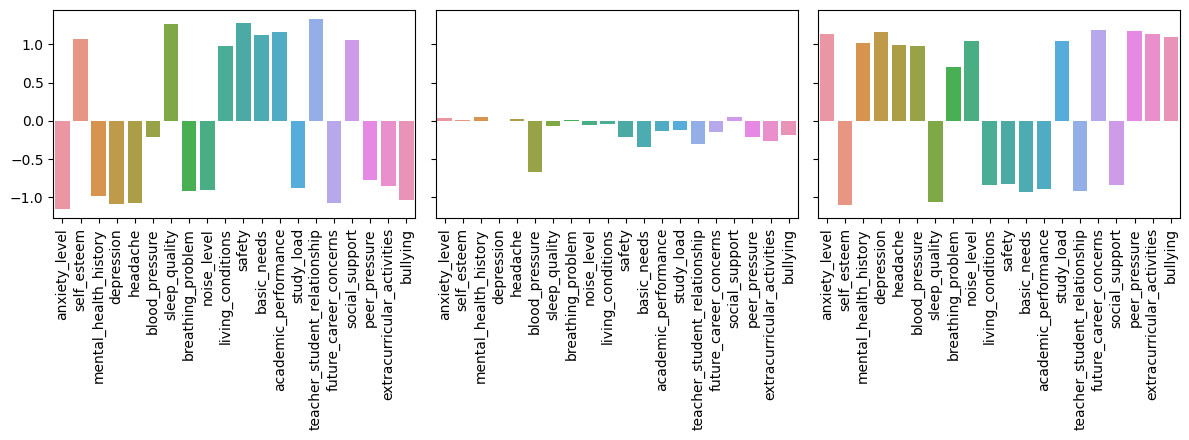

In [ ]:
fig, ax = plt.subplots(1,3,figsize=(12,4.5),sharey=True)

ax[0].tick_params(axis='x', labelrotation = 90)
sns.barplot(x=df_train.columns[0:-1],y=clf.cluster_centers_[0],ax=ax[0])
ax[1].tick_params(axis='x', labelrotation = 90)
sns.barplot(x=df_train.columns[0:-1],y=clf.cluster_centers_[1],ax=ax[1])
ax[2].tick_params(axis='x', labelrotation = 90)
sns.barplot(x=df_train.columns[0:-1],y=clf.cluster_centers_[2],ax=ax[2])

plt.tight_layout()
plt.show()

## Exercício 2.2.

Faça agora uma clusterização hierárquica empregando o linkage `complete` e outra empregando o linkage padrão `ward`. Ambas criando 3 grupos cada.



In [ ]:
from sklearn.cluster import AgglomerativeClustering

hclust1 = AgglomerativeClustering(n_clusters=3,linkage='complete').fit(X_test)
hclust2 = AgglomerativeClustering(n_clusters=3,linkage='ward').fit(X_test)

**Q7. A que grupos pertencem o 10 e 15 elementos do conjunto de teste no cluster hierárquico complete e ward respectivamente?**

In [ ]:
hclust1.labels_[[9,14]], hclust2.labels_[[9,14]]

(array([2, 0]), array([1, 2]))

**Q8. Qual o percentual de coincidências do cluster associado a cada instância dos dados há entre as duas clusterizações?**

In [ ]:
(hclust1.labels_ == hclust2.labels_).sum() / len(hclust1.labels_)

0.05454545454545454

## Exercício 2.3. (2.0)

A taxa de coincidência pode ter sido baixa por que podem ter sido apenas empregados 'rótulos' diferentes para cada cluster. Imagine todos elementos de um cluster (digamos A), mas que no método 1 (complete) foi associado o rótulo 1, e no método 2 (ward) foi associado o rótulo 0, serão dados como diferentes mas são o mesmo cluster. Desse modo, procure uma ordem diferente dos rótulos, que permita identificar melhor os grupos comuns entre os dois métodos de clusterização.

**Dica:** Empregue a matriz de confusão do `scikit-learn` comparando os dois agrupamentos.

**Q9. Depois de rearranjar os rótulos dos grupos de forma mais favorável, qual o percentual de coincidência obtido entre os grupos assinalados para os dados?**


In [ ]:
cm = confusion_matrix(hclust1.labels_, hclust2.labels_)
cm

array([[12,  0, 63],
       [19,  0,  0],
       [64, 62,  0]])

In [ ]:
cm = cm[[1,2,0],:]

print(cm, '\n', cm.diagonal().sum() / cm.sum())

[[19  0  0]
 [64 62  0]
 [12  0 63]] 
 0.6545454545454545
